In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

### Image Classification Project
#### Vincent Heningburg and Ashlee Pounds
#### Fruits 360 Dataset from Kaggle: https://www.kaggle.com/moltean/fruits/data

#### Project consists of creating a convolutional neural network to identify 131 different fruits and vegetables.


In [96]:
# dimensions of our images.
img_width, img_height = 100, 100

train_data_dir = 'data/fruits-360/Training'
test_data_dir = 'data/fruits-360/Test'
nb_train_samples = 67692
nb_test_samples = 22688
epochs = 20
batch_size = 16

In [3]:
def show_img(image_path):
    img = image.load_img(image_path, target_size=(100, 100))
    plt.imshow(img)

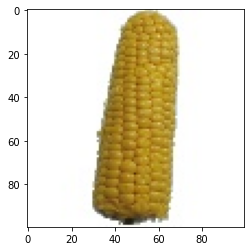

In [4]:
show_img('data/fruits-360/Training/Corn/36_100.jpg')

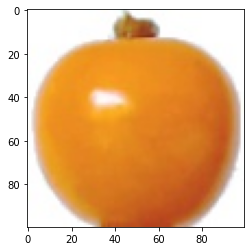

In [5]:
show_img('data/fruits-360/Training/Physalis/58_100.jpg')

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Reading/Processing the data.

In [7]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22688 images belonging to 131 classes.


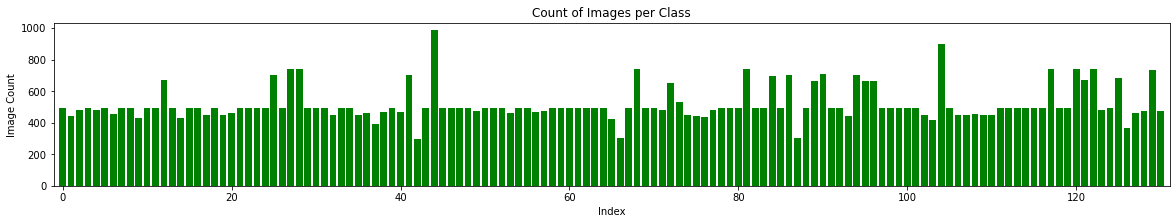

In [11]:
plt.figure(figsize=(20,3))
plt.margins(x = .005)
plt.bar(Counter(train_generator.labels).keys(), Counter(train_generator.labels).values(), color='green')
plt.xlabel("Index")
plt.ylabel("Image Count")
plt.title("Count of Images per Class")
plt.savefig('templates/static/images/bar_chart.jpg')
plt.show()

In [12]:
test_keys = list(test_generator.class_indices.keys())
test_values = list(Counter(train_generator.labels).values())
explain = {test_keys[i]: [f"Index: {i}", f"Count: {test_values[i]}"] for i in range(len(test_keys))}
explain

{'Apple Braeburn': ['Index: 0', 'Count: 492'],
 'Apple Crimson Snow': ['Index: 1', 'Count: 444'],
 'Apple Golden 1': ['Index: 2', 'Count: 480'],
 'Apple Golden 2': ['Index: 3', 'Count: 492'],
 'Apple Golden 3': ['Index: 4', 'Count: 481'],
 'Apple Granny Smith': ['Index: 5', 'Count: 492'],
 'Apple Pink Lady': ['Index: 6', 'Count: 456'],
 'Apple Red 1': ['Index: 7', 'Count: 492'],
 'Apple Red 2': ['Index: 8', 'Count: 492'],
 'Apple Red 3': ['Index: 9', 'Count: 429'],
 'Apple Red Delicious': ['Index: 10', 'Count: 490'],
 'Apple Red Yellow 1': ['Index: 11', 'Count: 492'],
 'Apple Red Yellow 2': ['Index: 12', 'Count: 672'],
 'Apricot': ['Index: 13', 'Count: 492'],
 'Avocado': ['Index: 14', 'Count: 427'],
 'Avocado ripe': ['Index: 15', 'Count: 491'],
 'Banana': ['Index: 16', 'Count: 490'],
 'Banana Lady Finger': ['Index: 17', 'Count: 450'],
 'Banana Red': ['Index: 18', 'Count: 490'],
 'Beetroot': ['Index: 19', 'Count: 450'],
 'Blueberry': ['Index: 20', 'Count: 462'],
 'Cactus fruit': ['Index

### Model Summary

In [97]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [98]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [99]:
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))

In [16]:
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [17]:
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [100]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation='softmax'))

In [ ]:
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_52 (ZeroPaddi (None, 102, 102, 3)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 98, 98, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 45, 45, 128)       147584    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 22, 22, 128)     

### Fitting the model.

In [103]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4230 steps, validate for 1418 steps
Epoch 1/20
4230/4230 [==============================] - 3056s 722ms/step - loss: 2.8121 - accuracy: 0.2313 - val_loss: 1.6140 - val_accuracy: 0.5306
Epoch 2/20
4230/4230 [==============================] - 3047s 720ms/step - loss: 1.2048 - accuracy: 0.6096 - val_loss: 1.0623 - val_accuracy: 0.7042
Epoch 3/20
4230/4230 [==============================] - 3044s 720ms/step - loss: 0.7392 - accuracy: 0.7585 - val_loss: 0.8646 - val_accuracy: 0.7595
Epoch 4/20
4230/4230 [==============================] - 3044s 720ms/step - loss: 0.5410 - accuracy: 0.8222 - val_loss: 0.6575 - val_accuracy: 0.8291
Epoch 5/20
4230/4230 [==============================] - 3045s 720ms/step - loss: 0.4487 - accuracy: 0.8554 - val_loss: 0.6589 - val_accuracy: 0.8324
Epoch 6/20
4230/4230 [==============================] - 3041s 719ms/step - loss: 0.3730 - accuracy: 0.8804 - val_loss: 0.6088 - val_accuracy: 0.8576
Epoch 7/20

In [104]:
acc = history.history['accuracy']
loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

In [121]:
#We wont need this since we can pull the data straight from the cell above

with open('model_metrics/accuracy8_18.txt', 'w') as filehandle:
    for listitem in acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/loss8_18.txt', 'w') as filehandle:
    for listitem in loss:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_accuracy8_18.txt', 'w') as filehandle:
    for listitem in test_acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_loss8_18.txt', 'w') as filehandle:
    for listitem in test_loss:
        filehandle.write('%s\n' % listitem)

In [122]:
#This just pulls in the files. We wont need to write it to txt 
#or do the below if we are getting it straight from the history object

text_file = open("model_metrics/accuracy8_18.txt", "r")
acc = text_file.read().split('\n')
text_file = open("model_metrics/loss8_18.txt", "r")
loss = text_file.read().split('\n')
text_file = open("model_metrics/test_accuracy8_18.txt", "r")
test_acc = text_file.read().split('\n')
text_file = open("model_metrics/test_loss8_18.txt", "r")
test_loss = text_file.read().split('\n')


#We will need to pop off the last empty element and convert 
#the numbers from there string data type to floats

acc.pop()
acc = np.array(acc)
acc = acc.astype(np.float)

loss.pop()
loss = np.array(loss)
loss = loss.astype(np.float)

test_acc.pop()
test_acc = np.array(test_acc)
test_acc = test_acc.astype(np.float)

test_loss.pop()
test_loss = np.array(test_loss)
test_loss = test_loss.astype(np.float)
    

In [123]:
#Get array of Epoch Numbers for X axis
epochs_arr = []
for i in range (epochs):
    epochs_arr.append(i)

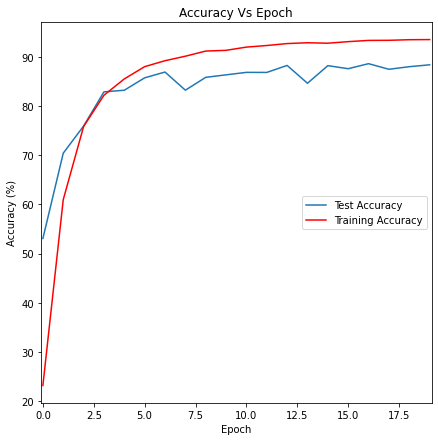

In [124]:
#Test Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs_arr, test_acc*100)
plt.plot(epochs_arr, acc*100, color = 'r')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Vs Epoch")
plt.legend(["Test Accuracy","Training Accuracy"],loc=5)
plt.savefig('templates/static/images/acc_chart.png')
plt.show()

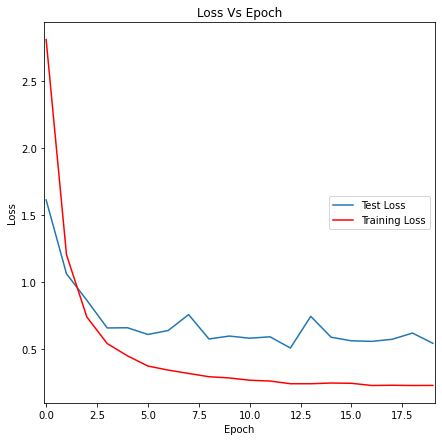

In [125]:
#Test Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs_arr, test_loss)
plt.plot(epochs_arr, loss, color = 'r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Vs Epoch")
plt.legend(["Test Loss","Training Loss"],loc=5)
plt.savefig('templates/static/images/loss_chart.png')
plt.show()

In [105]:
model.save("CNN8_15.h5")

In [ ]:
model = keras.models.load_model('CNN8_15.h5')

### Model prediction results.

In [106]:
def predict(image_path, N):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    predictions = model.predict(x)
    
    classes = np.flip(np.argsort(predictions[0])[-N:])
    prob = predictions[0][classes]
    prob = [f'{x*100: .3f}%' for x in prob]
    labels = list(test_generator.class_indices.keys())
    L = [labels[x] for x in classes]

#     plt.imshow(img)
    print('Predicted:', list(zip(L, prob)))


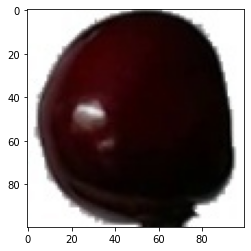

In [107]:
img = 'data/fruits-360/Test/Cherry 1/r_7_100.jpg'
show_img(img)

In [108]:
predict(img, 3)

Predicted: [('Cherry 1', ' 100.000%'), ('Avocado', ' 0.000%'), ('Plum', ' 0.000%')]


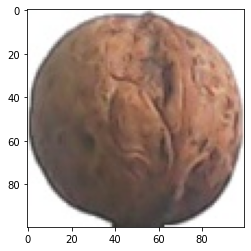

In [109]:
img = 'data/fruits-360/Test/Walnut/109_100.jpg'
show_img(img)

In [110]:
predict(img, 3)

Predicted: [('Walnut', ' 99.997%'), ('Beetroot', ' 0.003%'), ('Potato Red', ' 0.000%')]


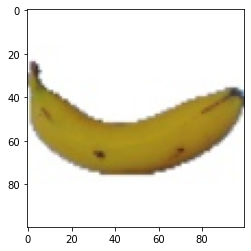

In [111]:
img = 'data/fruits-360/Test/Banana/114_100.jpg'
show_img(img)

In [112]:
predict(img, 3)

Predicted: [('Banana', ' 99.883%'), ('Corn', ' 0.116%'), ('Banana Lady Finger', ' 0.001%')]


### Practical test images.

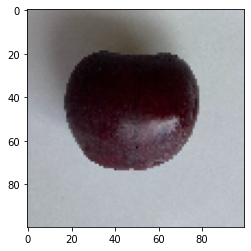

In [142]:
img = 'Pictures/cherry.jpg'
show_img(img)

In [143]:
predict(img, 3)

Predicted: [('Cherry Wax Black', ' 60.423%'), ('Dates', ' 12.655%'), ('Eggplant', ' 9.254%')]


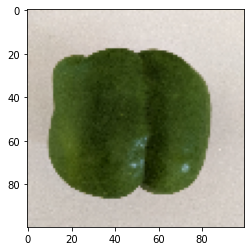

In [113]:
img = 'Pictures/Bell_Pepper.jpg'
show_img(img)

In [114]:
predict(img, 3)

Predicted: [('Nut Pecan', ' 20.324%'), ('Kiwi', ' 19.997%'), ('Cantaloupe 2', ' 19.356%')]


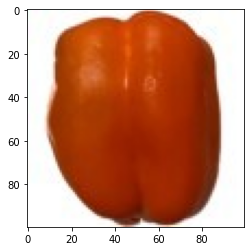

In [115]:
img = 'Pictures/orange_bell_clean.jpg'
show_img(img)

In [116]:
predict(img, 3)

Predicted: [('Pepper Yellow', ' 95.560%'), ('Lemon Meyer', ' 4.302%'), ('Clementine', ' 0.130%')]


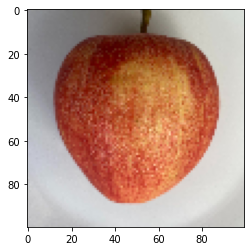

In [117]:
img = 'Pictures/gala_apple.jpg'
show_img(img)

In [118]:
predict(img, 3)

Predicted: [('Apple Red Yellow 1', ' 86.945%'), ('Peach 2', ' 11.381%'), ('Apple Red Yellow 2', ' 1.651%')]


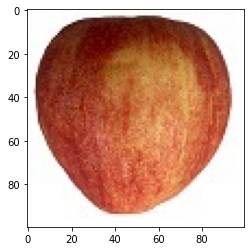

In [119]:
img = 'Pictures/apple_clean.jpg'
show_img(img)

In [120]:
predict(img, 3)

Predicted: [('Apple Red Yellow 1', ' 90.329%'), ('Peach 2', ' 9.629%'), ('Mandarine', ' 0.032%')]


## In Summary....

In [ ]:
model.history()

In [ ]:
print(history.history.keys())

In [ ]:
train_generator.labels

In [ ]:
Counter(train_generator.labels).values()

In [ ]:
Counter(train_generator.labels).keys()